In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


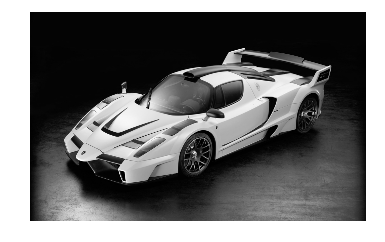

In [17]:
#Load the image
path_to_image = '../tests/images/Gray/gray.png'
img = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
sr.show_image(img)

In [21]:
binarizer = sr.DatadrivenBinarizer( lam=27,
                 area_factor_large=0.001,
                 area_factor_verylarge=0.01,
                 weights=(0.33, 0.33, 0.33),
                 offset=80,
                 num_levels=255,
                 connectivity=8)

In [22]:
t, binarized = binarizer.binarize_withthreshold(img, visualize=False)

In [23]:
print "threshold: ", t, "true threshold:", 106

threshold:  105 true threshold 106


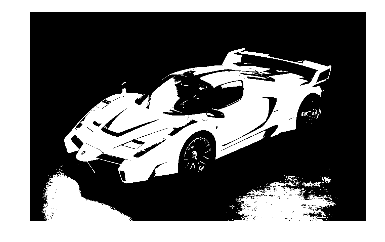

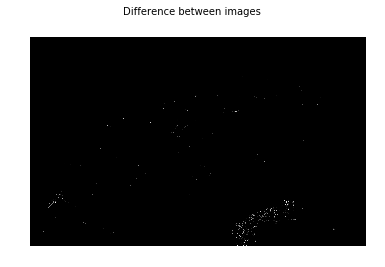

False

In [36]:
binarized_true = cv2.imread('../tests/images/Gray/gray_data_binarization.png', cv2.IMREAD_GRAYSCALE)
sr.show_image(binarized_true)
sr.image_diff(binarized, binarized_true)

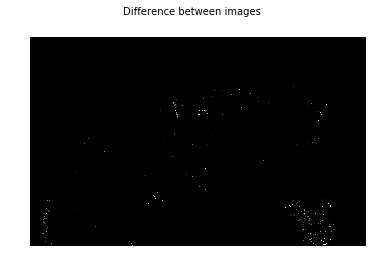

False

In [33]:
#See if the matlab image is binarized according to the threshold that it should
_, binarized106 = cv2.threshold(img, 104, 255, cv2.THRESH_BINARY)
sr.image_diff(binarized106, binarized_true)

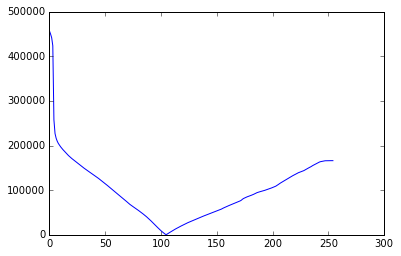

In [53]:
differences = np.zeros(255)
for t in xrange(0, 255):
    _, binarized_t = cv2.threshold(img, t, 255, cv2.THRESH_BINARY)
    differences[t] = sum(cv2.bitwise_xor(binarized_t, binarized_true))/255
    if sr.image_diff(binarized_t, binarized_true, visualize=False):
       print t
plt.plot(differences)

In [55]:
print differences.argmin(), differences.min()

105 843.0


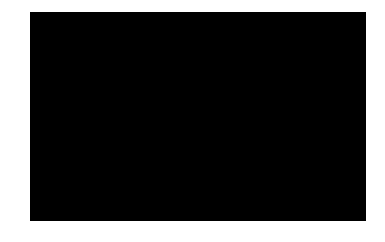

In [48]:
sr.show_image(binarized_t)